In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

In [86]:
df=pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Practice and Notes\\regression practice\\SOCR-HeightWeight.csv")

In [87]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [88]:
df.drop("Index",axis=1,inplace=True)

In [89]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [90]:
df.shape

(25000, 2)

<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

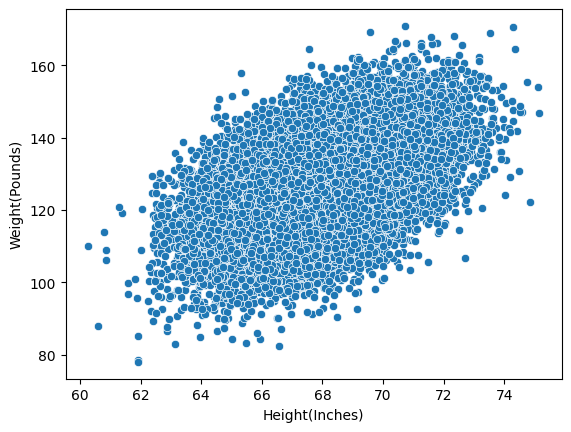

In [91]:
sns.scatterplot(data=df,x="Height(Inches)",y="Weight(Pounds)")

In [92]:
# devide data set into indipendent and dependent features

In [93]:
X=df[["Weight(Pounds)"]] # indipendent feature
Y=df["Height(Inches)"] # dependent feature

In [94]:
type(X),type(Y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [95]:
X.shape,Y.shape

((25000, 1), (25000,))

In [96]:
# further devide our dataset into train and test

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [99]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17500, 1), (7500, 1), (17500,), (7500,))

In [100]:
type(X_train),type(X_test),type(Y_train),type(Y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [101]:
# Standard scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()

In [104]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

In [105]:
type(X_train),type(X_test)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [106]:
# MODEL training

In [107]:
from sklearn.linear_model import LinearRegression 

In [108]:
regressor=LinearRegression()

In [109]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [112]:
Y_predict_train=regressor.predict(X_train)

In [127]:
type(Y_predict_train)

numpy.ndarray

<Axes: ylabel='Height(Inches)'>

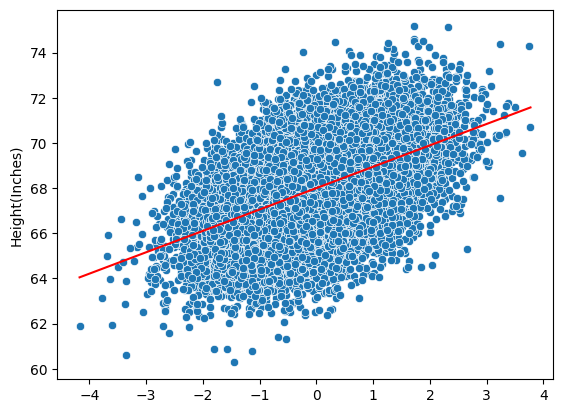

In [115]:
sns.scatterplot(x=X_train.flatten(),y=Y_train)
sns.lineplot(x=X_train.flatten(),y=Y_predict_train,color="red")

In [116]:
regressor.intercept_

67.99666177257143

In [117]:
regressor.coef_

array([0.94694738])

# Y(predict) = 67.99666177257143 + (0.94694738)*X

In [118]:
# performance metrix

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [121]:
MAE=mean_absolute_error(Y_train,Y_predict_train)
MSE=mean_squared_error(Y_train,Y_predict_train)
RMSE=MSE**0.5
R2=r2_score(Y_train,Y_predict_train)

In [122]:
MAE,MSE,RMSE,R2

(1.309507766512363,
 2.6915198171537305,
 1.6405852056975676,
 0.24990303048250362)